Question 6 (10 points)

Load the titanic dataset using seaborn using and answer the questions below 

import seaborn as sns
df = sns.load_dataset(‘titanic’);

Study the dataset and the goal here: https://www.kaggle.com/competitions/titanic
You can use seaborn or matplotlib or plotly or all of them.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
# check duplicated rows
df.duplicated().sum()

107

In [35]:
# remove duplicated rows
df2 = df.drop_duplicates()
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
# check missing rows
df2.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

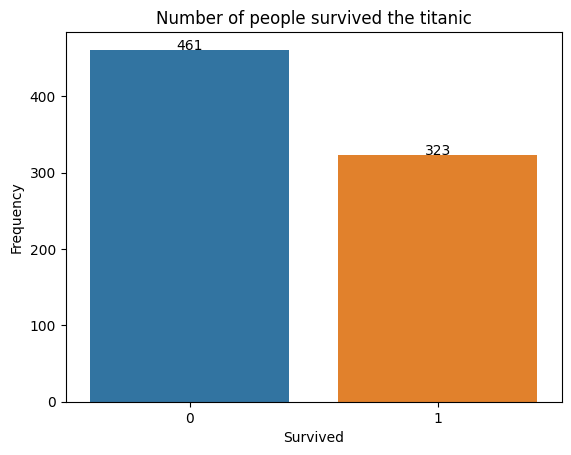

In [36]:
ax = sns.countplot(x=df2["survived"])
plt.title("Number of people survived the titanic")
plt.xlabel("Survived")
plt.ylabel("Frequency")


# Annotate the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.show()

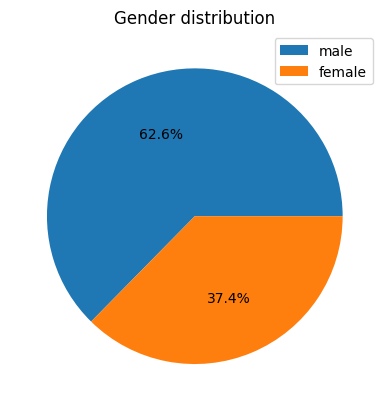

In [37]:
plt.pie(x=df2["sex"].value_counts(), autopct="%1.1f%%")
plt.title("Gender distribution")
plt.legend(df2["sex"].unique())

plt.annotate
plt.show()

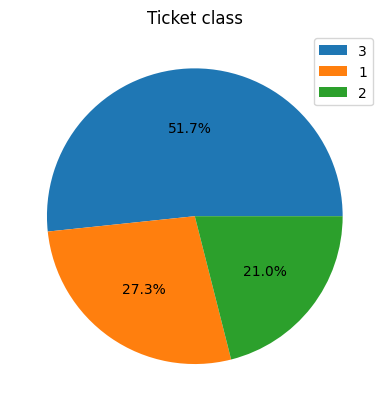

In [43]:
# Frequency of ticket class
plt.pie(df2["pclass"].value_counts(), autopct="%1.1f%%")
plt.legend(df2["pclass"].unique())
plt.title("Ticket class")
plt.show()

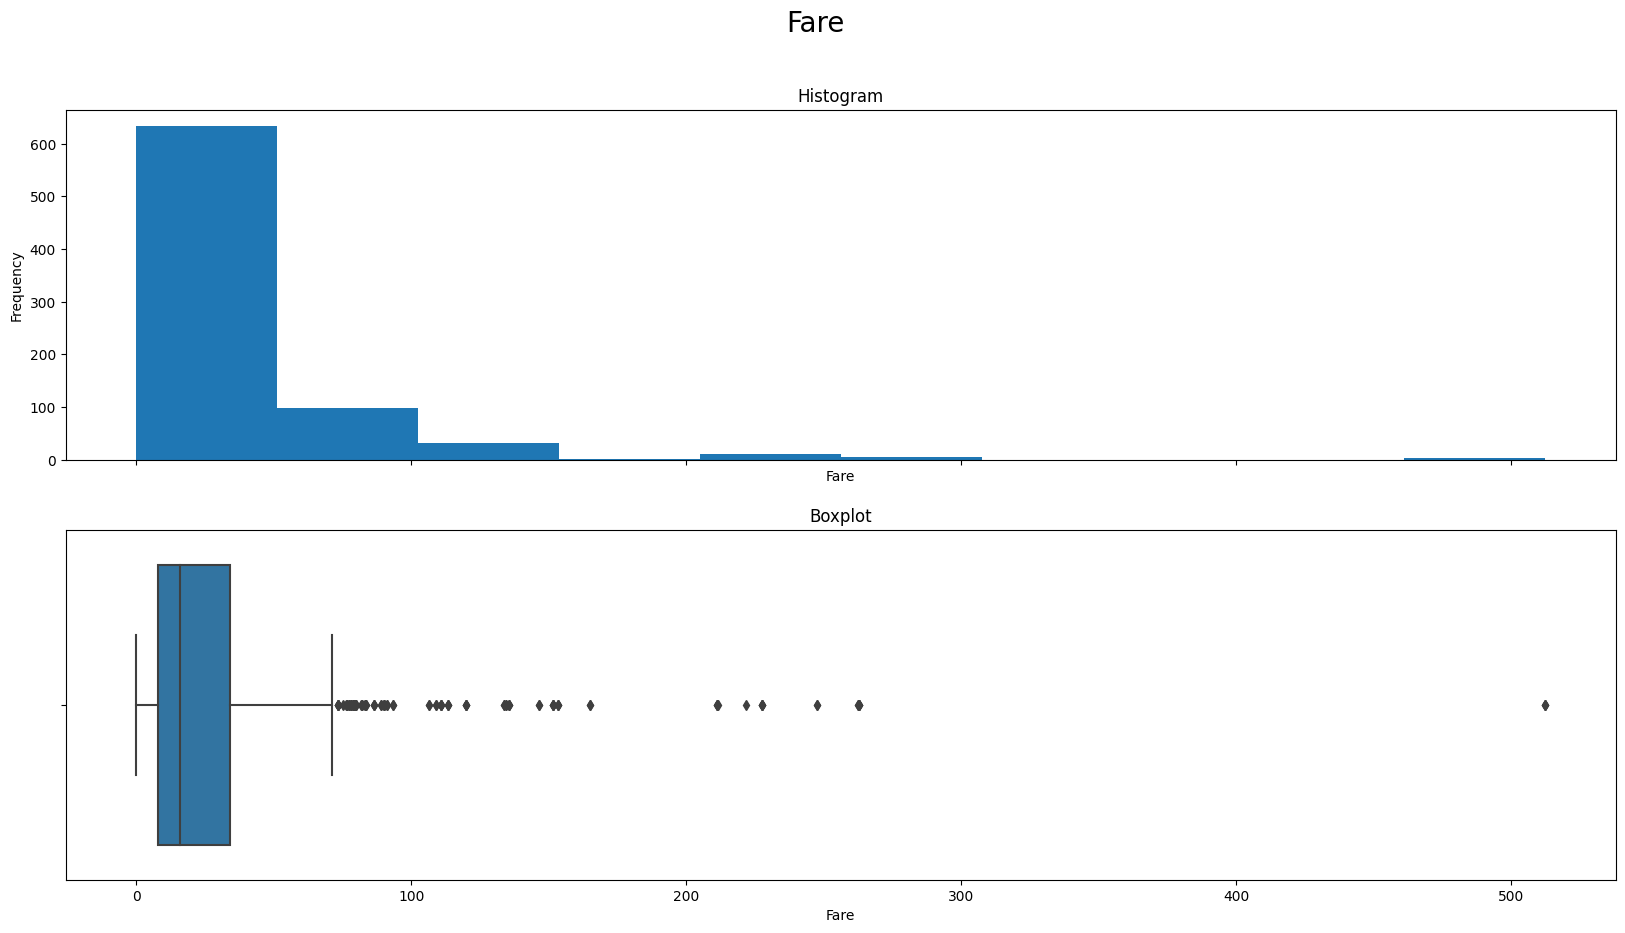

In [79]:
# histogram of fare paid by people
fig, ax = plt.subplots(2,1,figsize=(20,10), sharex=True)
fig.suptitle("Fare", fontsize=20)

ax[0].hist(df2["fare"])
ax[0].set_title("Histogram")
ax[0].set_xlabel("Fare")
ax[0].set_ylabel("Frequency")

sns.boxplot(x="fare",data=df2, ax=ax[1])
ax[1].set_title("Boxplot")
ax[1].set_xlabel("Fare")
plt.show()

In [80]:
# People who paid Fare between 0 and 100
df2[(df2["fare"] > 0) & (df2["fare"] < 100)].shape[0]

721

In [81]:
# People who paid Fare above 300
df2[df2["fare"] > 300].shape[0]

3

In [84]:
# interquartile range
q1, q3 = df2["fare"].quantile([0.25, 0.75])
iqr = q3 - q1
print(iqr)

26.05935
